<h1>PROGETTO FINALE MICHELE CECCARINI</h1>

Cominciamo con l'importare le liberie che utilizzeremo.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Adesso carichiamo il file e diamo una prima occhiata.

In [3]:
df = pd.read_csv(r"C:\Users\utente\Dropbox\PC\Desktop\Progetto Finale\Information_data Final Project.csv")
df.head(10)

,read_date,user_uuid,category,journalist_id,language,length,country,subscription_date,platform,article_id,stars
0,19-2-2022,190,sport,117,fr,long,fr,28-6-2021,tablet,331708,2
1,25-2-2021,243,art,117,it,short,it,24-8-2020,tablet,5128,3
2,19-12-2023,36,weather,115,en,long,uk,7-2-2021,tablet,733403,5
3,27-3-2023,162,finance,111,it,short,it,6-9-2022,tablet,612638,1
4,22-10-2023,181,economy,119,fr,short,fr,9-12-2020,tablet,211458,3
5,8-2-2023,163,art,120,fr,long,fr,28-11-2022,tablet,531439,4
6,18-2-2022,170,finance,122,it,short,it,7-10-2021,mobile,612187,1
7,18-9-2023,221,weather,110,en,medium,uk,25-4-2021,tablet,723993,5
8,5-9-2023,208,finance,117,en,medium,uk,20-11-2022,tablet,623177,2
9,20-7-2023,219,finance,116,it,short,it,24-12-2021,pc,6123,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   read_date          999 non-null    object
 1   user_uuid          999 non-null    int64 
 2   category           999 non-null    object
 3   journalist_id      999 non-null    int64 
 4   language           999 non-null    object
 5   length             999 non-null    object
 6   country            999 non-null    object
 7   subscription_date  999 non-null    object
 8   platform           999 non-null    object
 9   article_id         999 non-null    int64 
 10  stars              999 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 86.0+ KB


Non ci sono valori nulli. Ottimo!

In [5]:
df.shape

(999, 11)

In [6]:
df.duplicated().sum()

0

Il dataset è composto da 999 righe e 12 colonne. Non vi sono valori duplicati.

In [7]:
df.columns

Index(['read_date', 'user_uuid', 'category', 'journalist_id', 'language',
       'length', 'country', 'subscription_date', 'platform', 'article_id',
       'stars'],
      dtype='object')

<h2>Analisi categorie</h2>

In [8]:
df['category'].value_counts()

category
weather      321
sport        191
finance      134
economy      111
news         105
lifestyle     76
art           61
Name: count, dtype: int64

Rendiamo graficamente questi risultati. E' evidente che l'argomenti 'Meteo'  e 'Sport' sono quelli che vengono letti maggiormente.

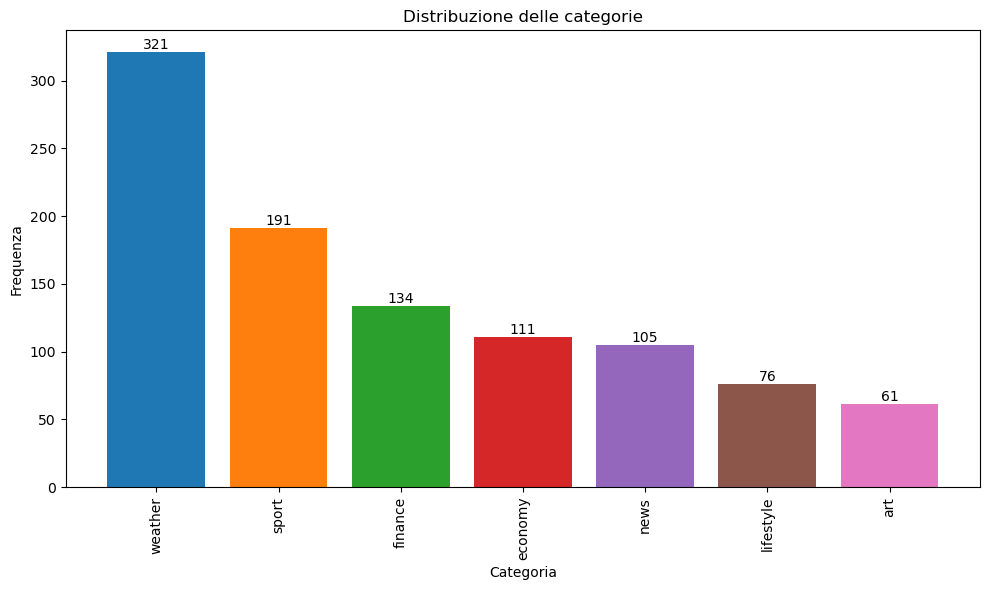

In [9]:
category_counts = df['category'].value_counts()
category_counts = category_counts.sort_values(ascending=False)
colors = plt.cm.tab10(range(len(category_counts)))

plt.figure(figsize=(10, 6))
bars = plt.bar(category_counts.index, category_counts, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')
    
plt.xlabel('Categoria')
plt.ylabel('Frequenza')
plt.title('Distribuzione delle categorie')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()


In [10]:
media_stelle_per_categoria = df.groupby('category')['stars'].mean()

media_stelle_per_categoria_ord = media_stelle_per_categoria.sort_values(ascending=False)

print("Categorie con le stelle più alte:")
print(media_stelle_per_categoria_ord)

Categorie con le stelle più alte:
category
news         3.209524
art          3.180328
lifestyle    3.157895
economy      3.000000
weather      3.000000
finance      2.873134
sport        2.780105
Name: stars, dtype: float64


Gli articoli di news, arte e lifestyle hanno le votazioni migliori, mentre i peggiori sono sport e finanza

<h2>Analisi giornalistica</h2>

In [11]:
num_distinct_values = df['user_uuid'].nunique()

print("Numero utenti registrati:", num_distinct_values)

Numero utenti registrati: 242


In [12]:
num_distinct_values = df['article_id'].nunique()

print("Numero articoli usciti:", num_distinct_values)

Numero articoli usciti: 987


In [13]:
num_distinct_values = df['journalist_id'].nunique()

print("Numero giornalisti:", num_distinct_values)

Numero giornalisti: 23


In [14]:
media_articoli_per_giornalista = df.groupby('journalist_id')['article_id'].count().mean().round(2)

print("Numero medio di articoli pubblicati da un giornalista:", media_articoli_per_giornalista )

Numero medio di articoli pubblicati da un giornalista: 43.43


In [15]:
media_stelle_per_giornalista = df.groupby('journalist_id')['stars'].mean()

media_max_stelle_per_giornalista = media_stelle_per_giornalista.idxmax()
giornalista_migliore = journalist_avg_stars.max()

print(f"Il giornalista con la media più alta delle stelle è l'id {media_max_stelle_per_giornalista} con una media di {giornalista_migliore} stelle.")

NameError: name 'journalist_avg_stars' is not defined

Qualcuno dia un premio a quest* giornalista!!

In [16]:
giornalista_122_df = df[df['journalist_id'] == 122]

category_counts = giornalista_122_df['category'].value_counts()

print(f"Gli articoli scritti dal giornalista con ID 122 appartengono principalmente alle seguenti categorie:")
print(category_counts)

Gli articoli scritti dal giornalista con ID 122 appartengono principalmente alle seguenti categorie:
category
weather      18
finance       8
sport         8
news          7
art           6
economy       4
lifestyle     3
Name: count, dtype: int64


In [17]:
articoli_giornalista_122 = df[df['journalist_id'] == 122]

best_article = articoli_giornalista_122.loc[articoli_giornalista_122['stars'].idxmax()]

print("L'articolo migliore del giornalista con ID 122 è:")
print(best_article)

L'articolo migliore del giornalista con ID 122 è:
read_date             3-5-2023
user_uuid                  174
category                 sport
journalist_id              122
language                    it
length                  medium
country                     it
subscription_date    12-2-2022
platform                mobile
article_id              322214
stars                        5
Name: 60, dtype: object


Quest* professionista ha scritto un articolo sportivo per mobile che gli è valso ben 5 stelle!!

<h2>Device utilizzati</h2>

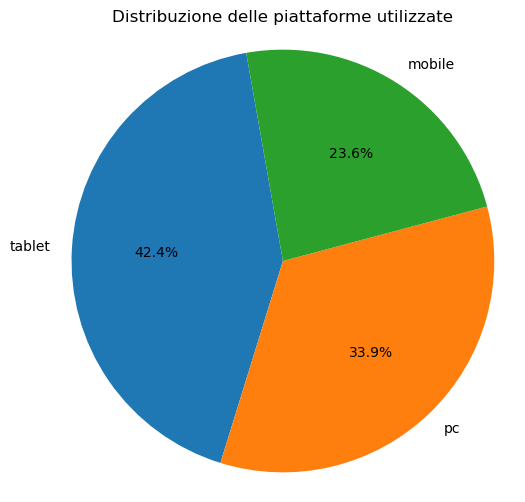

In [18]:
piattaforma = df['platform'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(piattaforma, labels=piattaforma.index, autopct='%1.1f%%', startangle=100)
plt.title('Distribuzione delle piattaforme utilizzate')
plt.axis('equal') 
plt.show()

I device più utilizzati per leggere gli articoli sono il tablet e il pc. Probabilmente è dovuto al fatto che uno schermo più grande rende la lettura più piacevole

In [19]:
media_stelle_per_device = df.groupby('platform')['stars'].mean()

media_stelle_per_device_ord = media_stelle_per_device.sort_values(ascending=False)

print("Device con le stelle più alte:")
print(media_stelle_per_device_ord)

Device con le stelle più alte:
platform
pc        3.041298
mobile    2.970339
tablet    2.950472
Name: stars, dtype: float64


Sembra che le votazioni migliori vengano date su PC, anche se non c'è uno scarto così marcato.

<h2>Lingue degli articoli</h2>

In [20]:
df['country'].value_counts()

country
it    462
uk    318
fr    219
Name: count, dtype: int64

In [21]:
matches = (df['language'] == df['country']) | ((df['language'] == 'en') & (df['country'] == 'uk'))

mismatched_rows = df[~matches]
print("Righe con lingua diversa dal paese dell'utente:")
print(mismatched_rows)

Righe con lingua diversa dal paese dell'utente:
Empty DataFrame
Columns: [read_date, user_uuid, category, journalist_id, language, length, country, subscription_date, platform, article_id, stars]
Index: []


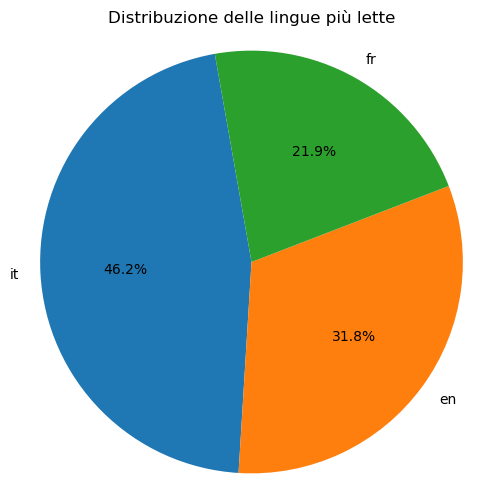

In [22]:
lingua = df['language'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(lingua, labels=lingua.index, autopct='%1.1f%%', startangle=100)
plt.title('Distribuzione delle lingue più lette')
plt.axis('equal') 
plt.show()

Gli articoli che venongo letti maggiormente sono quelli in italiano. Credevo che ci fosse una discrepanza tra il paese dell'utente e quello della lingua dell'articolo ( es. un italiano che legge articoli in inglese), ma il confronto non ha confermato questa teoria.

<h2> Distribuzione lunghezza degli articoli</h2>

Gli utenti preferiscono articoli più lunghi o più brevi?

(array([0, 1, 2]),
 [Text(0, 0, 'long'), Text(1, 0, 'short'), Text(2, 0, 'medium')])

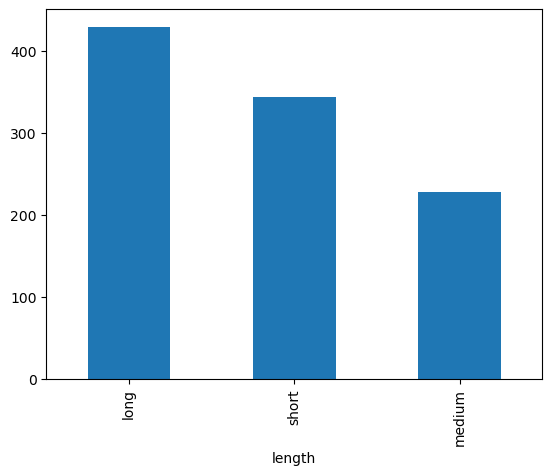

In [23]:
df['length'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)

In [24]:
category_length_counts = df.groupby(['category', 'length'])['length'].count()

most_common_length_per_category = category_length_counts.groupby(level=0).idxmax().apply(lambda x: x[1])

print("Categorie con la lunghezza più comune:")
print(most_common_length_per_category)


Categorie con la lunghezza più comune:
category
art          long
economy      long
finance      long
lifestyle    long
news         long
sport        long
weather      long
Name: length, dtype: object


<Figure size 1200x600 with 0 Axes>

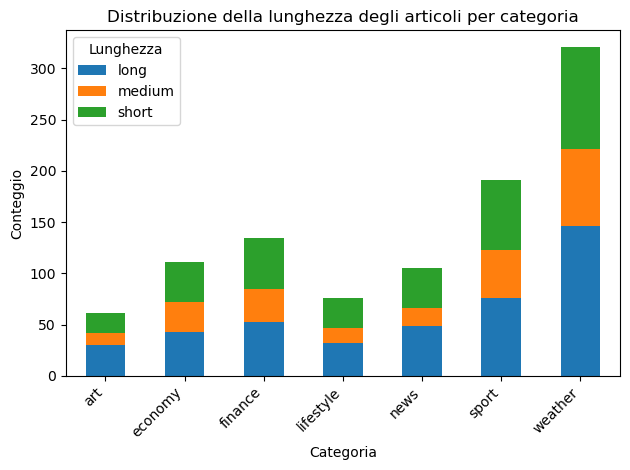

In [25]:
distribuzione_per_categoria = df.groupby(['category', 'length']).size().unstack()

plt.figure(figsize=(12, 6))
distribuzione_per_categoria.plot(kind='bar', stacked=True)
plt.xlabel('Categoria')
plt.ylabel('Conteggio')
plt.title('Distribuzione della lunghezza degli articoli per categoria')
plt.xticks(rotation=45, ha='right') 
plt.legend(title='Lunghezza')
plt.tight_layout()
plt.show()

<h3>C'è una correlazione tra la lunghezza dell'articolo e la votazione ricevuta?</h3>

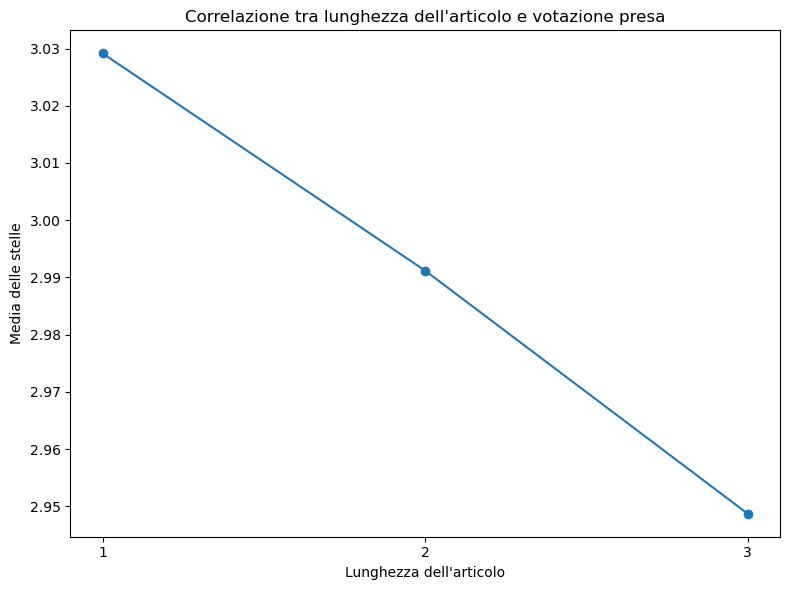

In [26]:
length_map = {'short': 1, 'medium': 2, 'long': 3}
df['length_numeric'] = df['length'].map(length_map)

mean_stars_by_length = df.groupby('length_numeric')['stars'].mean()

plt.figure(figsize=(8, 6))
plt.plot(mean_stars_by_length.index, mean_stars_by_length, marker='o', linestyle='-')
plt.xlabel('Lunghezza dell\'articolo')
plt.ylabel('Media delle stelle')
plt.title('Correlazione tra lunghezza dell\'articolo e votazione presa')
plt.xticks(mean_stars_by_length.index)
plt.tight_layout()


plt.show()

Beh, una correlazione c'è. Inversa, ma c'è! La votazione media dell'articolo diminusice all'aumentare della sua lunghezza!

<h2>C'è un momento migliore per abbonarsi?</h2>

C:\Users\utente\AppData\Local\Temp\ipykernel_9104\2981019113.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['subscription_date'] = pd.to_datetime(df['subscription_date'])


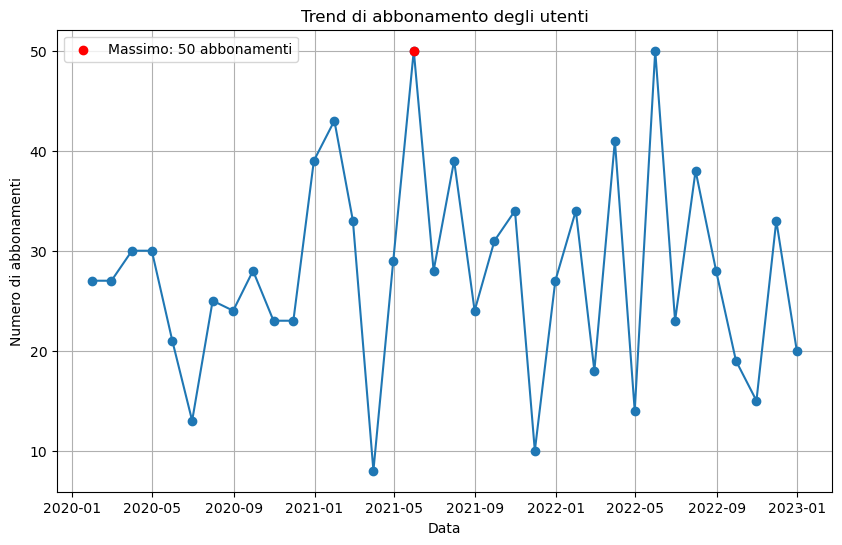

In [27]:
df['subscription_date'] = pd.to_datetime(df['subscription_date'])
monthly_subscriptions = df.resample('M', on='subscription_date').size()
plt.figure(figsize=(10, 6))
plt.plot(monthly_subscriptions.index, monthly_subscriptions, marker='o', linestyle='-')

max_value = monthly_subscriptions.idxmax()
max_subscriptions = monthly_subscriptions[max_value]
plt.scatter(max_value, max_subscriptions, color='red', label=f'Massimo: {max_subscriptions} abbonamenti', zorder=5)

plt.xlabel('Data')
plt.ylabel('Numero di abbonamenti')
plt.title('Trend di abbonamento degli utenti')
plt.legend()
plt.grid(True)

plt.show()


Dal grafico risulta che effettivamente ci sono dei picchi in cui le persone si abbonano, ma non vedo un andamento chiaro in questo

C:\Users\utente\AppData\Local\Temp\ipykernel_9104\1966470274.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['read_date'] = pd.to_datetime(df['read_date'])


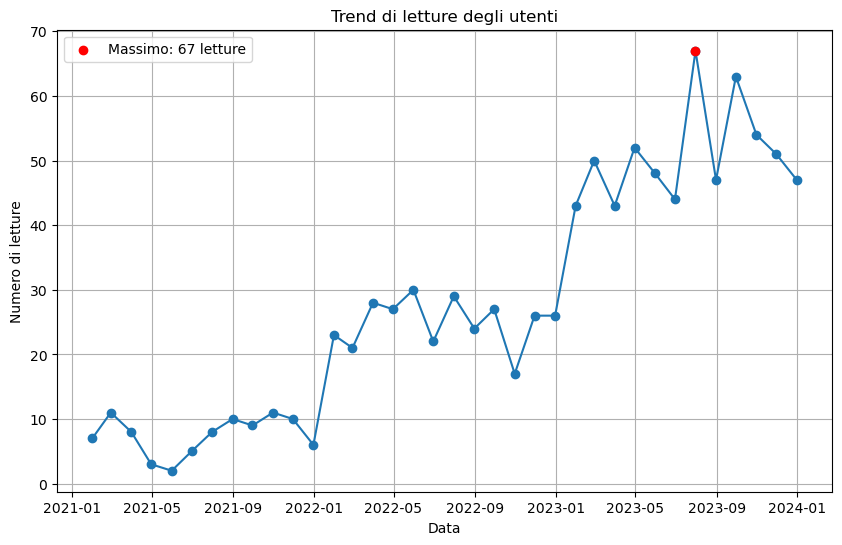

In [28]:
df['read_date'] = pd.to_datetime(df['read_date'])
letture_mensili = df.resample('M', on='read_date').size()
plt.figure(figsize=(10, 6))
plt.plot(letture_mensili.index, letture_mensili, marker='o', linestyle='-')

max_value = letture_mensili.idxmax()
max_letture = letture_mensili[max_value]
plt.scatter(max_value, max_letture, color='red', label=f'Massimo: {max_letture} letture', zorder=5)

plt.xlabel('Data')
plt.ylabel('Numero di letture')
plt.title('Trend di letture degli utenti')
plt.legend()
plt.grid(True)

plt.show()


E' interessante notare che, oltre al continuo aumentare dei lettori, ci sono dei picchi ad ogni inizio del nuovo anno!

<h2>Analisi profili </h2>

Ovvero, quanto impattano questi particolari profili sul totale delle letture?

In [36]:
andrea = df[(df['length'] == 'short') & (df['platform'] == 'mobile')]
alessandra = df[(df['length'] == 'long') & (df['platform'] == 'pc')]
amalia = df

total_andrea_reads = andrea.shape[0]
total_alessandra_reads = alessandra.shape[0]
total_amalia_reads = amalia.shape[0]

total_reads = total_andrea_reads + total_alessandra_reads + total_amalia_reads

andrea_percentage_total = (total_andrea_reads / total_reads) * 100
alessandra_percentage_total = (total_alessandra_reads / total_reads) * 100
amalia_percentage_total = (total_amalia_reads / total_reads) * 100

print(f"Percentuale di lettori del profilo di Andrea: {andrea_percentage_total:.2f}%")
print(f"Percentuale di lettori del profilo di Alessandra: {alessandra_percentage_total:.2f}%")
print(f"Percentuale di lettori del profilo di Amalia: {amalia_percentage_total:.2f}%")


Percentuale di lettori del profilo di Andrea: 7.11%
Percentuale di lettori del profilo di Alessandra: 11.20%
Percentuale di lettori del profilo di Amalia: 81.68%


Ovviamente il profilo Amalia è molto generico e ha accesso a tutti gli articoli e tutti i device, quindi è inevitabilmente maggioritario. Tuttavia questo ci da un'idea di quanto impattano gli altri sul totale delle letture.

<h2>Conclusioni</h2>

- Le categorie lette maggiormente sono Meteo e Sport
- La categoria con le stelle più alte è News
- Pc e tablet sono device preferiti per leggere gli articoli
- La maggior parte degli articoli sono letti in Italia in lingua italiana
- Gli articoli più letti sono quelli più lunghi, ma questi sono anche quelli con le votazioni medie più basse
- Apparentemente non c'è un periodo migliore per abbonarsi, ma notiamo dei picchi di lettura dopo ogni inizio del nuovo anno

<h2>Suggerimenti per la redazione</h2>

In seguito all'indagine emerge come dovremmo concentrarci nel pubblicare articoli ottimizzati per pc e tablet. Dobbiamo prediligere articoli in lingua italiana e inglese e concentrare la loro uscita nei primi mesi dell'anno. 
Gli argomenti Meteo e Sport si sposano molto bene con i nostri temi di scienza e tecnologia; potremmo concentrarci nello scrivere articoli che, utilizzando l'AI e le nuove tecnologie, permettono di sviluppare modelli climatici e metereologici più affidabili. Anche l'importanza della ricerca scientifica nello sport e lo studio delle performance sarà da prediligere. Da no articoli di approfondimento, ma facendo molta attenzione alla qualità. Le recensioni contano! Non abbandoniamo totalmente gli articoli in "pillole", ma piuttosto integriamoli negli articoli più complessi sotto forma di bullet-point ad inizio lettura.